<a href="https://colab.research.google.com/github/Shubhamxx16/Linear-optimization-with-PuLP-in-Python/blob/main/IPL_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#loading req libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
ipl = pd.read_csv('matches.csv')

In [4]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
ipl.shape

(756, 18)

In [13]:
#Getting the freq of most man of the match awards
ipl['player_of_match'].value_counts()

,count
player_of_match,
CH Gayle,21
AB de Villiers,20
MS Dhoni,17
RG Sharma,17
DA Warner,17
...,...
Imran Tahir,1
K Paul,1
K Ahmed,1


In [14]:
#Top 5 MOTM
ipl['player_of_match'].value_counts()[0:5]

,count
player_of_match,
CH Gayle,21
AB de Villiers,20
MS Dhoni,17
RG Sharma,17
DA Warner,17


<Axes: xlabel='player_of_match'>

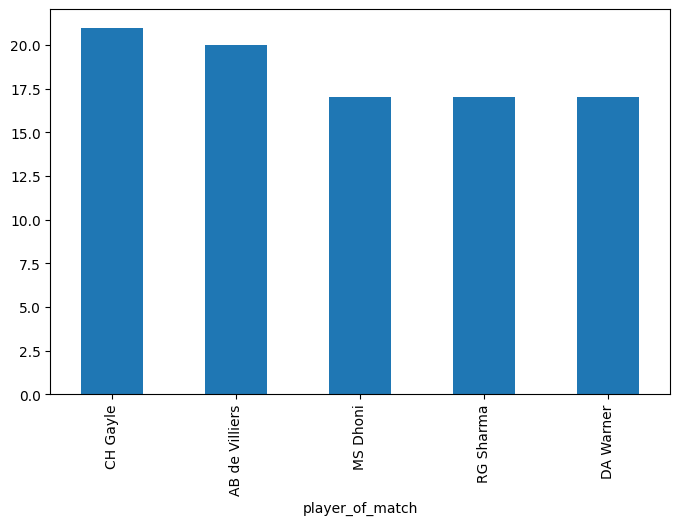

In [16]:
# ploting the above results
plt.figure(figsize=(8,5))
ipl['player_of_match'].value_counts()[0:5].plot(kind='bar')

<BarContainer object of 5 artists>

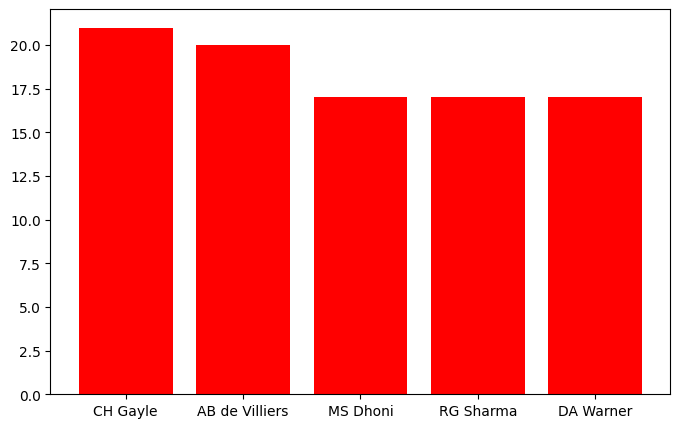

In [21]:
#ploting the same result alt
plt.figure(figsize=(8,5))
plt.bar(list(ipl['player_of_match'].value_counts()[0:5].keys()),list(ipl['player_of_match'].value_counts()[0:5]),color ='r')

In [22]:
ipl['result'].value_counts()

,count
result,
normal,743
tie,9
no result,4


In [23]:
# Team who won most tosses
ipl['toss_winner'].value_counts()

,count
toss_winner,
Mumbai Indians,98
Kolkata Knight Riders,92
Chennai Super Kings,89
Kings XI Punjab,81
Royal Challengers Bangalore,81
Delhi Daredevils,80
Rajasthan Royals,80
Sunrisers Hyderabad,46
Deccan Chargers,43


In [28]:
#Extracting the records where teams have won batting first
batting_first = ipl[ipl['win_by_runs'] != 0]
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


Text(0.5, 1.0, 'Distribution of win by runs')

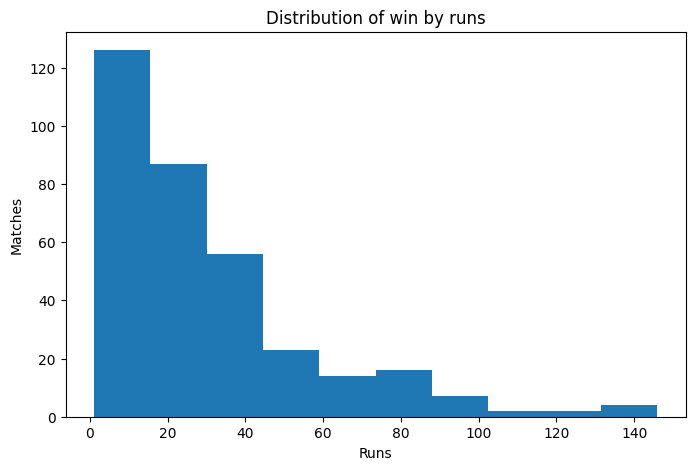

In [32]:
#plot histogram for the above data
plt.figure(figsize=(8,5))
plt.hist(batting_first['win_by_runs'])
plt.xlabel('Runs')
plt.ylabel('Matches')
plt.title('Distribution of win by runs')

In [33]:
# Finding out the number of wins w.r.t to each team batting first
batting_first['winner'].value_counts()

,count
winner,
Mumbai Indians,57
Chennai Super Kings,52
Kings XI Punjab,38
Kolkata Knight Riders,36
Royal Challengers Bangalore,35
Sunrisers Hyderabad,30
Rajasthan Royals,27
Delhi Daredevils,25
Deccan Chargers,18


<Axes: xlabel='winner'>

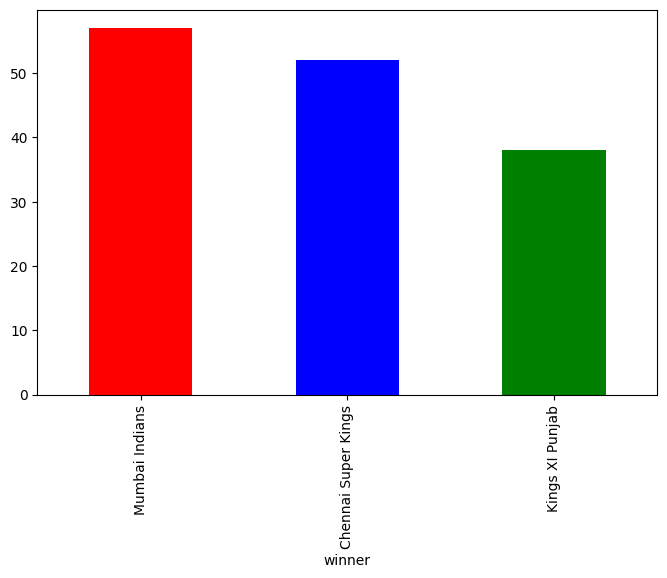

In [37]:
plt.figure(figsize=(8,5))
batting_first['winner'].value_counts()[0:3].plot(kind='bar',color=['r','b','g'])

<Axes: ylabel='count'>

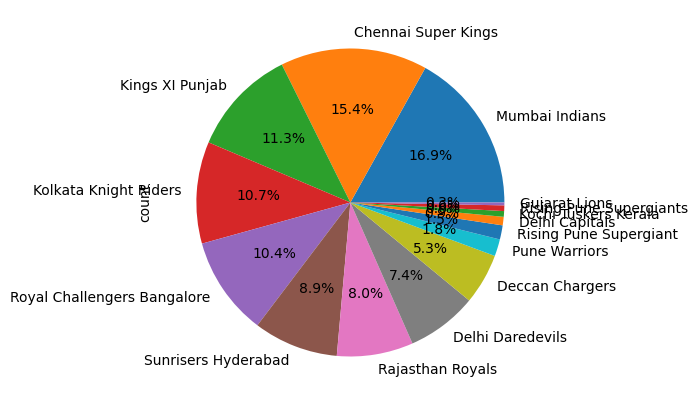

In [45]:
# Making pie chart for winners while batting first
plt.figure(figsize=(8,5))
batting_first['winner'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [46]:
# Extracting records where team won by batting second
batting_second = ipl[ipl['win_by_wickets'] != 0]
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


Text(0.5, 1.0, 'Distribution of win by wickets')

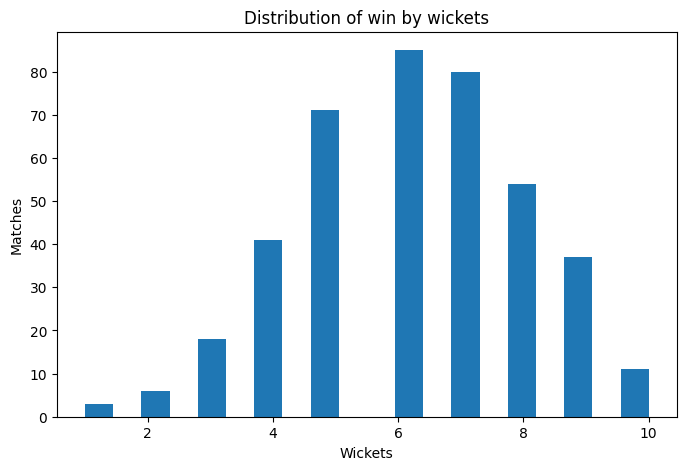

In [51]:
#plot histogram for freq of wins wrt number of wickets
plt.figure(figsize=(8,5))
plt.hist(batting_second['win_by_wickets'],bins=20)
plt.xlabel('Wickets')
plt.ylabel('Matches')
plt.title('Distribution of win by wickets')

In [52]:
# Finding out the number of wins w.r.t to each team batting second
batting_second['winner'].value_counts()

,count
winner,
Kolkata Knight Riders,56
Mumbai Indians,50
Royal Challengers Bangalore,48
Chennai Super Kings,48
Rajasthan Royals,46
Delhi Daredevils,42
Kings XI Punjab,42
Sunrisers Hyderabad,27
Gujarat Lions,12


Text(0.5, 1.0, 'Number of wins w.r.t to each team batting second')

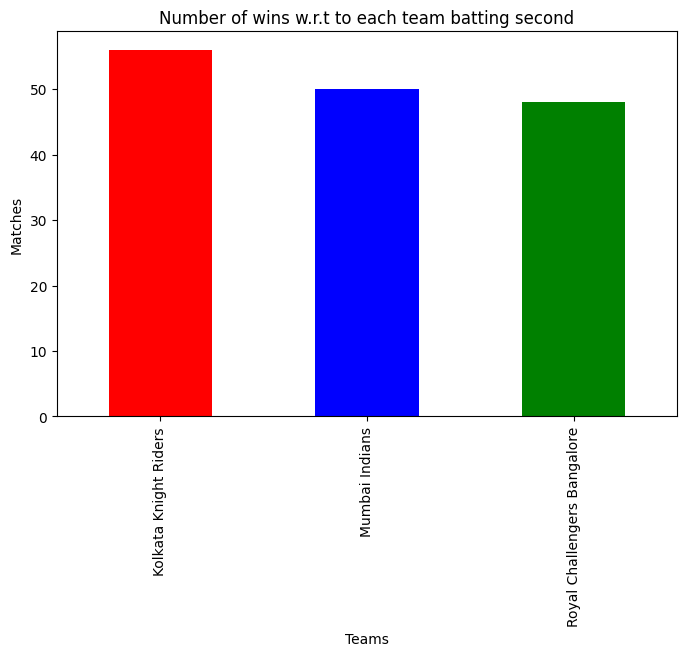

In [55]:
plt.figure(figsize= (8,5))
batting_second['winner'].value_counts()[0:3].plot(kind = 'bar',color=['r','b','g'])
plt.xlabel('Teams')
plt.ylabel('Matches')
plt.title('Number of wins w.r.t to each team batting second')

<Axes: ylabel='count'>

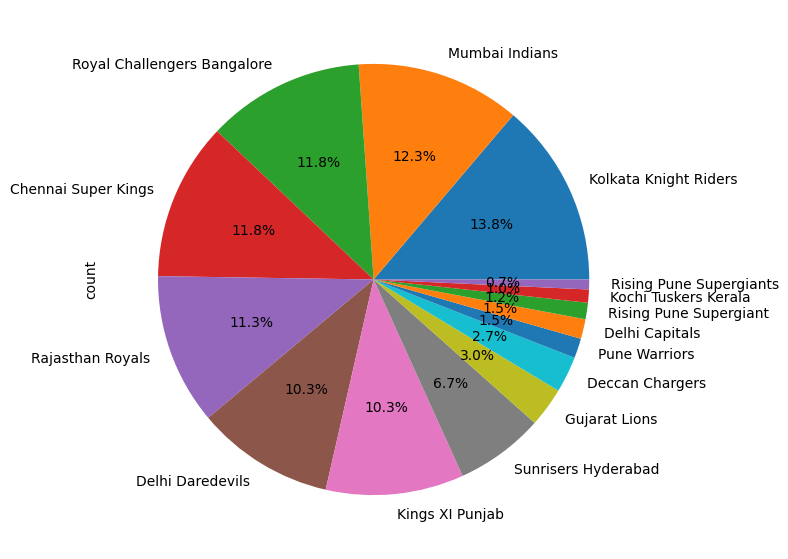

In [62]:
# Making pie chart for winners while batting second
plt.figure(figsize=(7,7))
batting_second['winner'].value_counts().plot(kind= 'pie',autopct='%0.1f%%')

In [65]:
#number of amtches played each season
ipl['season'].value_counts()

,count
season,
2013,76
2012,74
2011,73
2010,60
2016,60
2018,60
2019,60
2014,60
2017,59


In [66]:
ipl['city'].value_counts()

,count
city,
Mumbai,101
Kolkata,77
Delhi,74
Bangalore,66
Hyderabad,64
Chennai,57
Jaipur,47
Chandigarh,46
Pune,38


In [77]:
# Finding ot how many times a team has won the match after wining the toss
import numpy as np
np.sum(ipl['toss_winner']==ipl['winner'])
percentage = round((np.sum(ipl['toss_winner']==ipl['winner'])/ipl.shape[0])*100,2)
print(str(percentage) + '%')


51.98%
